# Model
Exicting part, try different types regression model.


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.datasets import make_regression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data, specify index so it's easier to join and search using loc
path = '../../../data/new-york-city-airbnb-open-data/'
listings_csv = os.path.join(path,'model_columns_listings.csv')
listings = pd.read_csv(listings_csv)

In [3]:
#shape
listings.shape

(28444, 87)

In [4]:
listings.columns.values

array(['Unnamed: 0', 'id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_verifications',
       'host_identity_verified', 'latitude', 'longitude',
       'is_location_exact', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'last_review_days_ago', 'cleaning_fee_yes_no',
       'security_deposit_yes_no', 'extra_people_yes_no',
       'neighbourhood_group_cleansed_Bronx',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_

In [5]:
#head
listings.head(10)

,Unnamed: 0,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_identity_verified,...,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,1,2595,733294,3.0,87%,38%,0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",1,...,0,0,1,0,0,0,0,0,0,1
1,2,3831,733383,1.0,83%,96%,0,1.0,"['email', 'phone', 'reviews', 'kba']",1,...,1,0,0,0,0,0,0,0,0,1
2,3,5099,733440,2.5,NaN,71%,0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",0,...,1,0,0,0,0,0,0,0,0,1
3,5,5121,733441,2.5,NaN,67%,0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",0,...,0,0,1,0,0,0,0,1,0,0
4,6,5178,733469,3.0,90%,100%,0,1.0,"['email', 'phone', 'facebook', 'reviews']",0,...,0,0,1,0,0,0,0,0,0,1
5,8,5238,733445,2.0,100%,26%,1,4.0,"['email', 'phone', 'manual_online', 'reviews',...",1,...,0,0,1,0,0,0,0,0,0,1
6,9,5441,733454,2.0,100%,56%,1,1.0,"['email', 'phone', 'reviews', 'kba']",1,...,0,0,0,0,0,0,0,0,0,1
7,10,5552,733460,3.0,100%,20%,0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,...,1,0,0,0,0,0,0,0,0,1
8,11,5803,733476,2.0,100%,99%,1,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,...,0,0,1,0,0,0,0,0,0,1
9,12,6021,733493,3.0,90%,84%,0,2.0,"['email', 'phone', 'reviews', 'offline_governm...",0,...,0,0,1,0,0,0,0,0,0,1


# Features/Target
Features to be included and test/train split, take out 'latitude', 'longitude'
Also due to removing certain price, the following is gone: 'property_type_Train', 'property_type_Dome house', 'property_type_Dorm', 'host_verifications_google', 'property_type_Island', 'property_type_In-law', 'property_type_Yurt', 'property_type_Bus', 'property_type_Timeshare', 'property_type_Farm stay', 'property_type_Treehouse'
Remove 'review locations', this is the same as neigbourhood

In [6]:
####### old one with amenities ############

# X = listings[['host_since', 'host_response_time', 'host_is_superhost', 'host_listings_count', 
# 'host_identity_verified', 'is_location_exact', 'accommodates', 'bathrooms', 'bedrooms', 
# 'beds', 'security_deposit_yes_no', 'cleaning_fee_yes_no', 'guests_included','extra_people_yes_no', 'number_of_reviews', 
# 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
# 'review_scores_checkin', 'review_scores_communication', 'review_scores_value',
# 'instant_bookable', 'reviews_per_month', 'host_verifications_ facebook', 'host_verifications_ google', 
# 'host_verifications_ government_id', 'host_verifications_ identity_manual', 'host_verifications_ jumio',
# 'host_verifications_ kba', 'host_verifications_ manual_offline', 'host_verifications_ manual_online', 
# 'host_verifications_ offline_government_id', 'host_verifications_ phone', 'host_verifications_ reviews',
# 'host_verifications_ selfie', 'host_verifications_ sent_id', 'host_verifications_ sesame', 
# 'host_verifications_ sesame_offline', 'host_verifications_ weibo', 'host_verifications_ work_email', 
# 'host_verifications_ zhima_selfie', 'host_verifications_email', 'host_verifications_facebook', 
# 'host_verifications_jumio', 'host_verifications_offline_government_id', 'host_verifications_phone', 
# 'host_verifications_reviews', 'neighbourhood_group_cleansed_Bronx', 'neighbourhood_group_cleansed_Brooklyn', 
# 'neighbourhood_group_cleansed_Manhattan', 'neighbourhood_group_cleansed_Queens', 
# 'neighbourhood_group_cleansed_Staten Island', 'property_type_Apartment','property_type_Barn', 
# 'property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper/RV', 
# 'property_type_Castle', 'property_type_Cave', 'property_type_Condominium', 'property_type_Cottage', 
# 'property_type_Earth house', 'property_type_Guest suite', 'property_type_Guesthouse', 'property_type_Hostel', 
# 'property_type_House', 'property_type_Houseboat', 'property_type_Lighthouse','property_type_Loft', 
# 'property_type_Other', 'property_type_Tent', 'property_type_Tiny house', 
# 'property_type_Townhouse', 'property_type_Villa', 'room_type_Entire home/apt', 'room_type_Hotel room', 
# 'room_type_Private room', 'room_type_Shared room', 'cancellation_policy_flexible', 
# 'cancellation_policy_moderate', 'cancellation_policy_strict', 'cancellation_policy_strict_14_with_grace_period', 
# 'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60', 'bed_type_Airbed', 'bed_type_Couch', 
# 'bed_type_Futon','bed_type_Pull-out Sofa', 'bed_type_Real Bed', 'amenities_ toilet', 'amenities_24-hour check-in', 
# 'amenities_Accessible-height bed','amenities_Accessible-height toilet', 'amenities_Air conditioning', 
# 'amenities_Air purifier', 'amenities_BBQ grill', 'amenities_Baby bath', 'amenities_Baby monitor',
# 'amenities_Babysitter recommendations', 'amenities_Baking sheet', 'amenities_Barbecue utensils',
# 'amenities_Bath towel', 'amenities_Bathrobes', 'amenities_Bathroom essentials', 'amenities_Bathtub',
# 'amenities_Bathtub with bath chair', 'amenities_Beach essentials', 'amenities_Beachfront', 'amenities_Bed linens', 
# 'amenities_Bedroom comforts', 'amenities_Bluetooth speaker', 'amenities_Body soap', 'amenities_Bottled water', 
# 'amenities_Bread maker', 'amenities_Breakfast','amenities_Building staff', 'amenities_Buzzer/wireless intercom',
# 'amenities_Cable TV', 'amenities_Carbon monoxide detector', 'amenities_Cat(s)', 'amenities_Changing table', 
# 'amenities_Children’s books and toys', 'amenities_Children’s dinnerware', 'amenities_Cleaning before checkout', 
# 'amenities_Coffee maker', 'amenities_Cooking basics', 'amenities_Crib', 'amenities_Disabled parking spot',
# 'amenities_Dishes and silverware', 'amenities_Dishwasher', 'amenities_Dog(s)', 'amenities_Doorman', 'amenities_Dryer',
# 'amenities_EV charger', 'amenities_Electric profiling bed', 'amenities_Elevator', 'amenities_Essentials', 
# 'amenities_Ethernet connection', 'amenities_Extra pillows and blankets', 'amenities_Extra space around bed', 
# 'amenities_Family/kid friendly', 'amenities_Fire extinguisher', 'amenities_Fireplace guards', 
# 'amenities_Firm mattress', 'amenities_First aid kit', 'amenities_Fixed grab bars for shower',
# 'amenities_Fixed grab bars for toilet', 'amenities_Flat path to guest entrance',
# 'amenities_Free parking on premises', 'amenities_Free street parking', 'amenities_Full kitchen', 
# 'amenities_Game console', 'amenities_Garden or backyard', 'amenities_Ground floor access', 'amenities_Gym',
# 'amenities_Hair dryer', 'amenities_Handheld shower head', 'amenities_Hangers', 'amenities_Heating', 
# 'amenities_High chair', 'amenities_Host greets you', 'amenities_Hot tub',
# 'amenities_Hot water', 'amenities_Hot water kettle', 'amenities_Indoor fireplace', 'amenities_Internet', 
# 'amenities_Iron', 'amenities_Keypad', 'amenities_Kitchen',
# 'amenities_Kitchenette', 'amenities_Lake access', 'amenities_Laptop friendly workspace',
# 'amenities_Lock on bedroom door', 'amenities_Lockbox', 'amenities_Long term stays allowed',
# 'amenities_Luggage dropoff allowed', 'amenities_Microwave', 'amenities_Mini bar', 'amenities_Mini fridge', 
# 'amenities_Mobile hoist', 'amenities_No stairs or steps to enter', 'amenities_Other', 'amenities_Other pet(s)',
# 'amenities_Outlet covers', 'amenities_Oven', 'amenities_Pack ’n Play/travel crib',
# 'amenities_Paid parking off premises', 'amenities_Paid parking on premises', 'amenities_Patio or balcony', 
# 'amenities_Pets allowed', 'amenities_Pets live on this property', 'amenities_Pocket wifi', 'amenities_Pool',
# 'amenities_Private bathroom', 'amenities_Private entrance', 'amenities_Private living room', 
# 'amenities_Record player', 'amenities_Refrigerator', 'amenities_Room-darkening shades', 'amenities_Safe',
# 'amenities_Safety card', 'amenities_Self check-in', 'amenities_Shampoo', 'amenities_Shower chair', 
# 'amenities_Shower gel','amenities_Single level home', 'amenities_Ski-in/Ski-out', 'amenities_Slippers',
# 'amenities_Smart lock', 'amenities_Smoke detector', 'amenities_Smoking allowed', 'amenities_Snacks',
# 'amenities_Stair gates', 'amenities_Step-free shower', 'amenities_Stove', 'amenities_Suitable for events',
# 'amenities_TV', 'amenities_Table corner guards', 'amenities_Toilet paper', 'amenities_Trash can', 
# 'amenities_Turndown service', 'amenities_Washer', 'amenities_Washer/Dryer', 'amenities_Waterfront',
# 'amenities_Well-lit path to entrance', 'amenities_Wheelchair accessible', 'amenities_Wide clearance to shower',
# 'amenities_Wide doorway to guest bathroom', 'amenities_Wide entrance', 'amenities_Wide entrance for guests', 
# 'amenities_Wide entryway', 'amenities_Wide hallways', 'amenities_Wifi', 'amenities_Window guards',
# 'last_review_days_ago']]

# y = listings['price']

# # Split your data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X = listings[['host_since', 'host_response_time', 'host_is_superhost', 'host_listings_count', 
'host_identity_verified', 'is_location_exact', 'accommodates', 'bathrooms', 'bedrooms', 
'beds', 'security_deposit_yes_no', 'cleaning_fee_yes_no', 'guests_included','extra_people_yes_no', 'number_of_reviews', 
'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
'review_scores_checkin', 'review_scores_communication', 'review_scores_value',
'instant_bookable', 'reviews_per_month', 'neighbourhood_group_cleansed_Bronx', 'neighbourhood_group_cleansed_Brooklyn', 
'neighbourhood_group_cleansed_Manhattan', 'neighbourhood_group_cleansed_Queens', 
'neighbourhood_group_cleansed_Staten Island', 'property_type_Apartment','property_type_Barn', 
'property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper/RV', 
'property_type_Castle', 'property_type_Cave', 'property_type_Condominium', 'property_type_Cottage', 
'property_type_Earth house', 'property_type_Guest suite', 'property_type_Guesthouse', 'property_type_Hostel', 
'property_type_House', 'property_type_Houseboat', 'property_type_Lighthouse','property_type_Loft', 
'property_type_Other', 'property_type_Tent', 'property_type_Tiny house', 
'property_type_Townhouse', 'property_type_Villa', 'room_type_Entire home/apt', 'room_type_Hotel room', 
'room_type_Private room', 'room_type_Shared room', 'cancellation_policy_flexible', 
'cancellation_policy_moderate', 'cancellation_policy_strict', 'cancellation_policy_strict_14_with_grace_period', 
'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60', 'bed_type_Airbed', 'bed_type_Couch', 
'bed_type_Futon','bed_type_Pull-out Sofa', 'bed_type_Real Bed', 'last_review_days_ago']]

y = listings['price']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression

In [8]:
#using CV
regressor = Lasso(alpha=0.5)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

print(rmse_scores)


[ 91.54261796  81.57685589  87.08159444  91.4577319   93.2227625
  91.64978246  90.28282206  92.32694718  87.05684126 105.25867427]


In [9]:
pred_train = regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))


91.14566299233199
0.4886833785658812


In [10]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

84.34414831915764
0.4919124089671121


# Ridge Regression

In [11]:
#using CV
regressor = Ridge(alpha=0.5)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)
print(rmse_scores)


[ 91.34322282  81.46724498  86.97856406  91.32383665  92.88859251
  91.44432464  89.95130622  92.06957244  86.40762742 105.06734911]


In [12]:
pred_train = regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))


90.89416408378891
0.4932212519782315


In [13]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

84.16188470995439
0.49410594157307086


# Random Forest

In [14]:
#using CV
regressor = RandomForestRegressor(n_estimators=100, random_state=None, min_samples_split=100)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores) 
print(rmse_scores)

[ 85.34726215  75.9742311   83.44128403  85.15860664  86.60470255
  85.50756569  85.80333173  88.2312287   81.28520773 100.28393347]


In [15]:
pred_train= regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))

85.76373538035945
0.6174946005652338


In [16]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

79.8142035618908
0.5450234192776362


# Gradient Boost

In [17]:
#using CV
regressor = GradientBoostingRegressor(random_state=0)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores) 
print(rmse_scores)

[85.33767564 74.92191402 82.81924877 80.59611788 87.63813573 85.8644918
 84.90405981 84.74669743 80.82773091 98.74545182]


In [18]:
pred_train= regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))

84.64015238148872
0.602071344134392


In [19]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

77.45547564742729
0.5715176626624272


# Feature Importance
this was for gradient boosting - run the same code for random forest, make sure run the fit/model first, it uses same regessor variable

In [25]:
#get features importance
features = regressor.feature_importances_

#get column names from our list of features
column_names=X.columns.values.tolist()

#match features importance to column name
df = pd.DataFrame([features], columns=column_names)


In [26]:
df.head()

,host_since,host_response_time,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,...,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,last_review_days_ago
0,0.008419,0.000031,0.000378,0.009773,0.000281,0.000451,0.184848,0.169538,0.238162,0.003205,...,0.0,0.002092,0.000803,0.000533,0.0,0.0,0.0,0.0,0.0,0.003398


In [27]:
#features importance sorted
features_sorted = df.iloc[0].sort_values(ascending=False)

In [28]:
features_sorted.head(60)


bedrooms                                           0.238162
accommodates                                       0.184848
room_type_Entire home/apt                          0.179028
bathrooms                                          0.169538
neighbourhood_group_cleansed_Manhattan             0.132197
property_type_Loft                                 0.011236
review_scores_rating                               0.011086
host_listings_count                                0.009773
guests_included                                    0.009043
host_since                                         0.008419
extra_people_yes_no                                0.007709
review_scores_cleanliness                          0.005327
number_of_reviews                                  0.003465
last_review_days_ago                               0.003398
reviews_per_month                                  0.003307
beds                                               0.003205
security_deposit_yes_no                 

# Using Yellowbrick to visuzlize

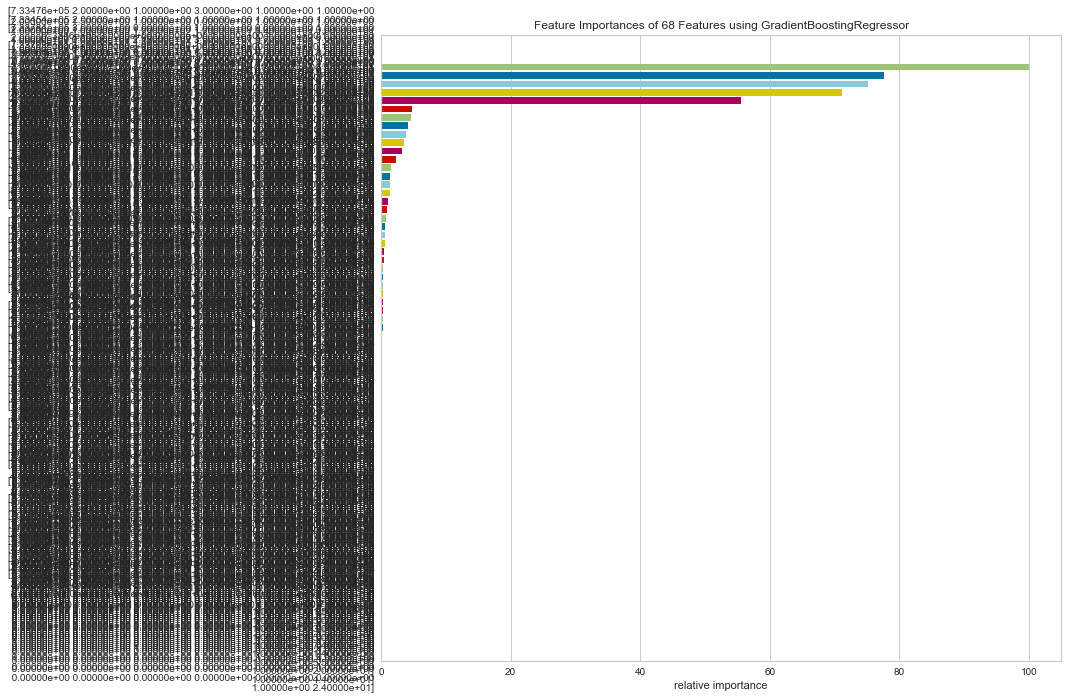

In [21]:
from yellowbrick.features import FeatureImportances

model = regressor = GradientBoostingRegressor(random_state=0)
viz = FeatureImportances(model, labels=X, size=(1080, 720))

viz.fit(X_train, y_train)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.show()

# Model Output for Testing Flask
Using very few features

In [98]:
X = listings[['bedrooms',
            'accommodates',
            'room_type_Entire home/apt',
            'bathrooms',
            'neighbourhood_group_cleansed_Manhattan',
            'property_type_Loft',
            'amenities_Free street parking']]

y = listings['price']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boost
For testing flask

In [99]:
#using CV
# regressor = Lasso(alpha=0.1)
# regressor = regressor.fit(X_train, y_train) 

#using CV
regressor = GradientBoostingRegressor(random_state=0)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

print(rmse_scores)

[86.69528739 77.10785964 86.53339494 84.14168615 89.65546095 87.27550644
 87.11778648 85.00449831 81.1734252  99.76561591]


In [100]:
pred_train = regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))

86.44705214009849
0.5685566647172172


In [101]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

79.63597311670388
0.5470531366579381


In [102]:
# Saving model to disk
pickle.dump(regressor, open('model.pkl','wb'))

# Webapp

In [11]:
%%HTML

'<iframe width="700" height="600" src="http://seebeyond.pythonanywhere.com" frameborder="0" allowfullscreen></iframe>'
